In [1]:
# from ucimlrepo import fetch_ucirepo 
  
# # fetch dataset 
# heart_disease = fetch_ucirepo(id=45) 
  
# # data (as pandas dataframes) 
# X = heart_disease.data.features 
# y = heart_disease.data.targets 
  
# # metadata 
# print(heart_disease.metadata) 
  
# # variable information 
# print(heart_disease.variables) 


Inital exploartion

In [2]:
from ucimlrepo import fetch_ucirepo 
  # fetch dataset 
heart_disease = fetch_ucirepo(id=45) 

In [3]:
# metadata 
print(heart_disease.metadata) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [4]:
# variable information 
print(heart_disease.variables) 

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [5]:
# data (as pandas dataframes) 
X = heart_disease.data.features 
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        2  3.0   3.0  
2        2  2.0

In [6]:
y = heart_disease.data.targets 
print(y)

     num
0      0
1      2
2      1
3      0
4      0
..   ...
298    1
299    2
300    3
301    1
302    0

[303 rows x 1 columns]


In [7]:
type(X)
type(y)
#note they are both pandas dataframes --> so we can use pandas.concat to combine them

import pandas as pd
# Combine the features and target into a single DataFrame
combined_df = pd.concat([X, y], axis=1)
combined_df.head()  # Display the first few rows of the combined DataFrame

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Cleaning the dataframe

In [8]:
# look from varaible information which features have missing values

# go to df --> get the index of the missing values for each of the features

#look at the number of missing values 

# removed the rows with those indexes --> or column?

In [9]:
# get # of missing values for each of the features

variables_info = heart_disease.variables
variables_info.head()

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no


In [10]:
features_with_missing_values = variables_info[variables_info['missing_values'] != 'no']['name']

In [11]:
indexes_to_remove = []
for feature in features_with_missing_values:
    print(feature)
    print(combined_df[feature].index[combined_df[feature].isnull()])
    indexes_to_remove.extend(combined_df[feature].index[combined_df[feature].isnull()])

ca
Index([166, 192, 287, 302], dtype='int64')
thal
Index([87, 266], dtype='int64')


In [12]:
print(combined_df.iloc[indexes_to_remove])
combined_df.drop(index=indexes_to_remove, inplace=True)
print(combined_df.isnull().sum())

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
166   52    1   3       138   223    0        0      169      0      0.0   
192   43    1   4       132   247    1        2      143      1      0.1   
287   58    1   2       125   220    0        0      144      0      0.4   
302   38    1   3       138   175    0        0      173      0      0.0   
87    53    0   3       128   216    0        2      115      0      0.0   
266   52    1   4       128   204    1        0      156      1      1.0   

     slope   ca  thal  num  
166      1  NaN   3.0    0  
192      2  NaN   7.0    1  
287      2  NaN   7.0    0  
302      1  NaN   3.0    0  
87       1  0.0   NaN    0  
266      2  0.0   NaN    2  
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


Value distributions/histograms

<Figure size 1500x1000 with 0 Axes>

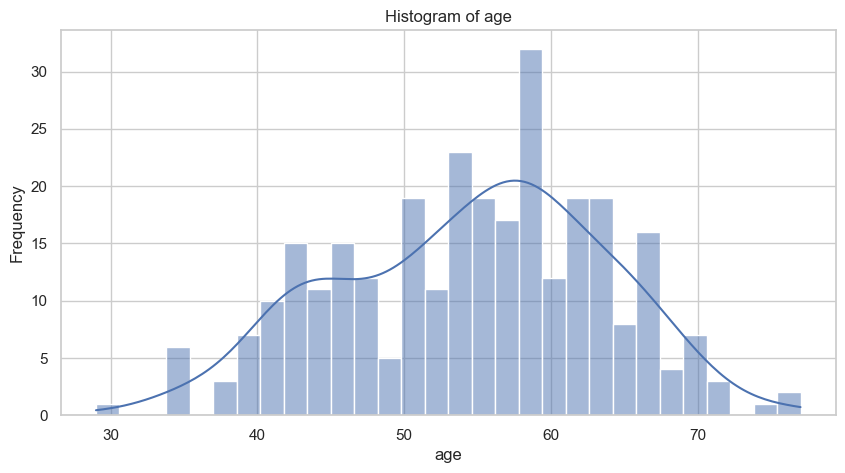

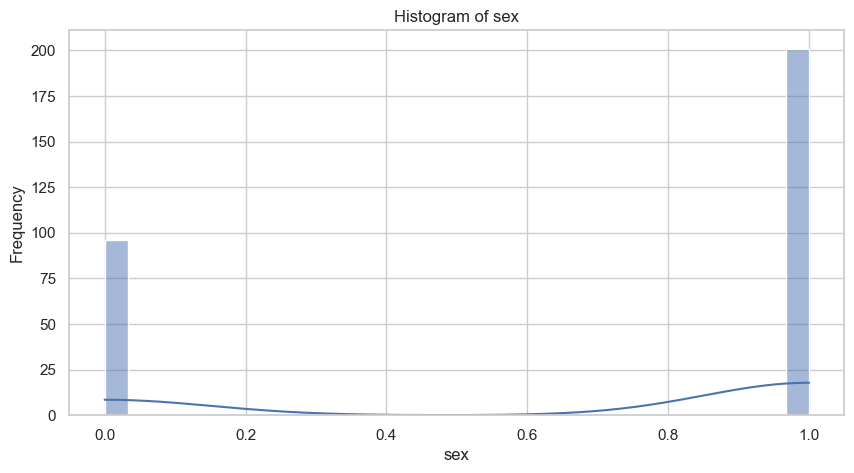

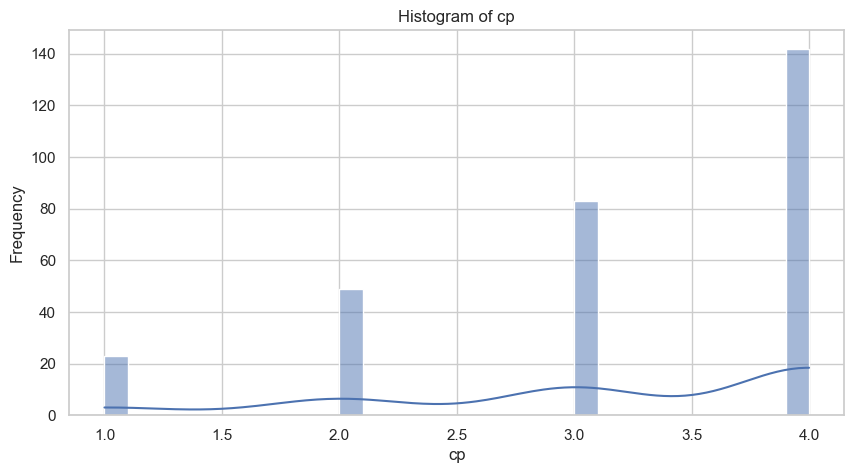

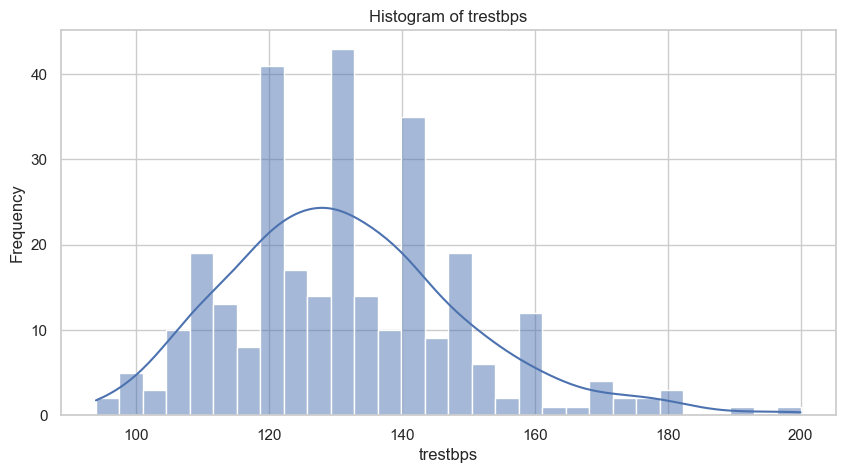

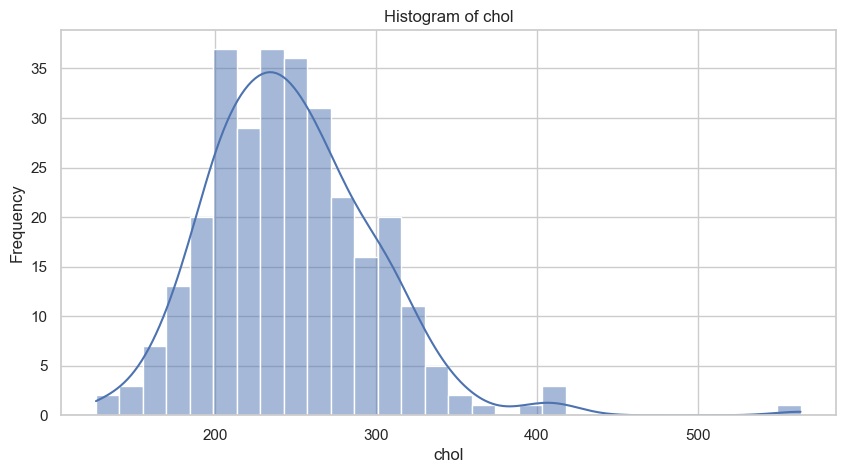

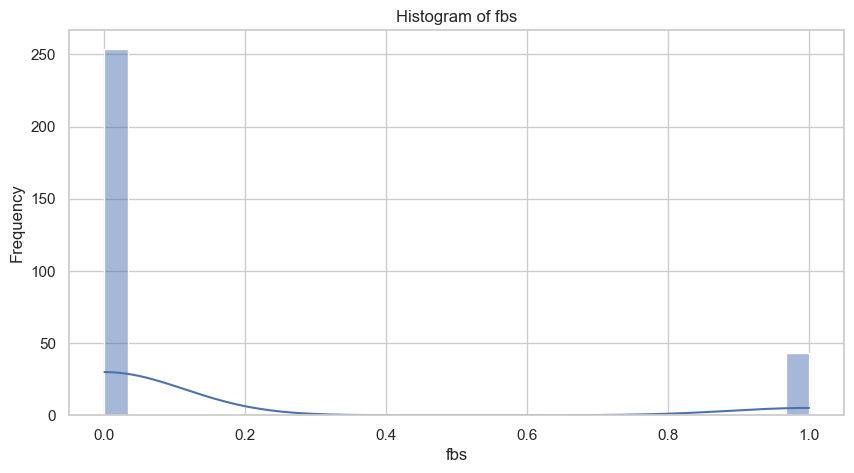

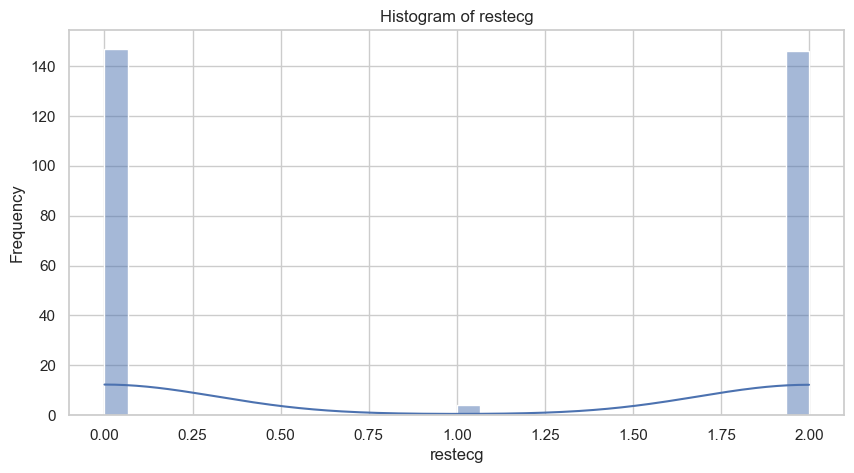

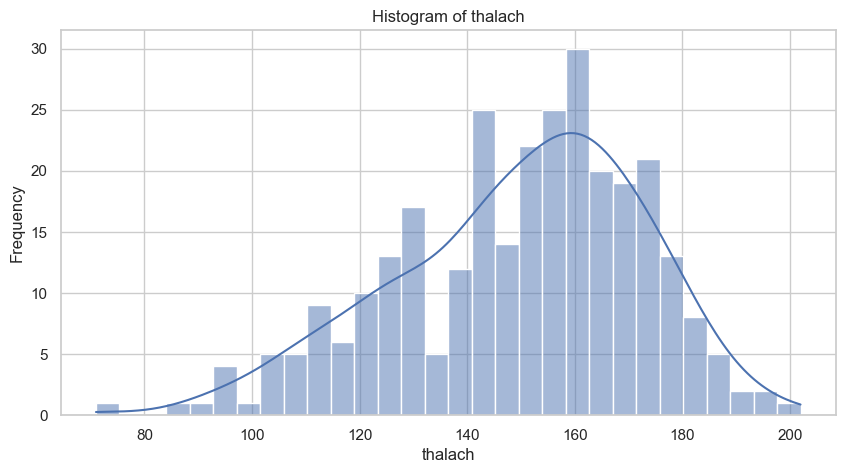

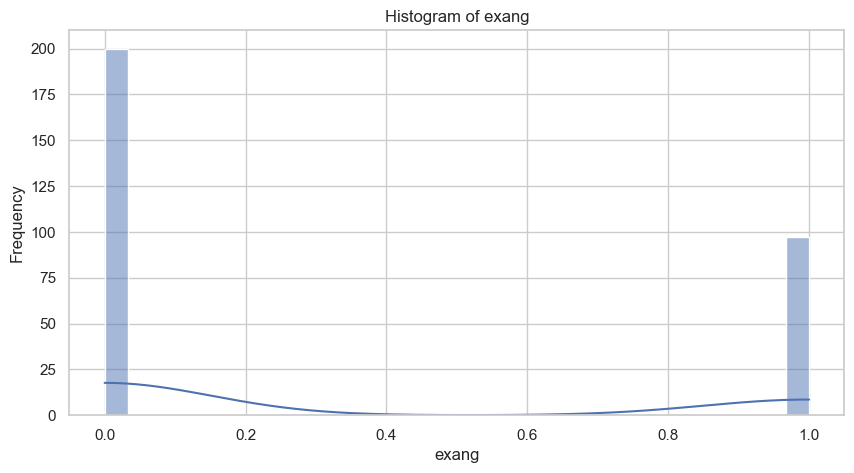

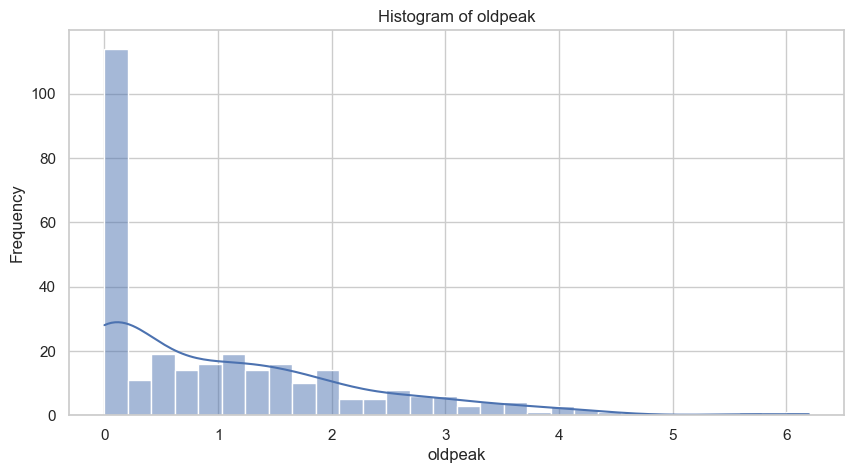

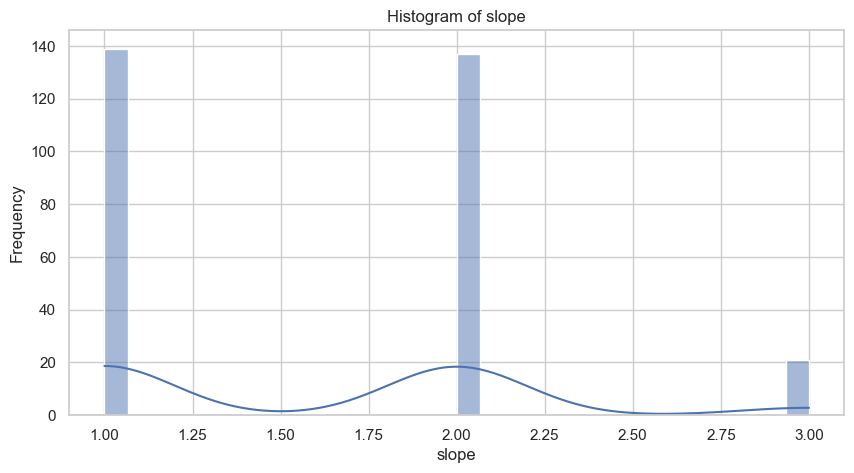

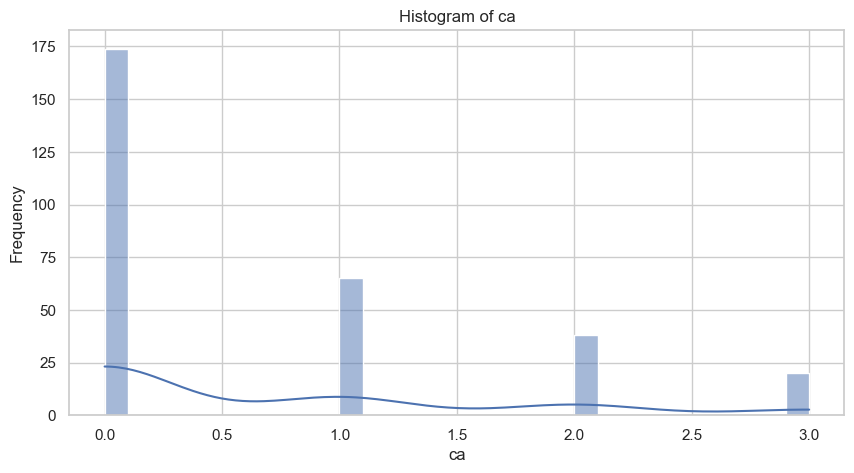

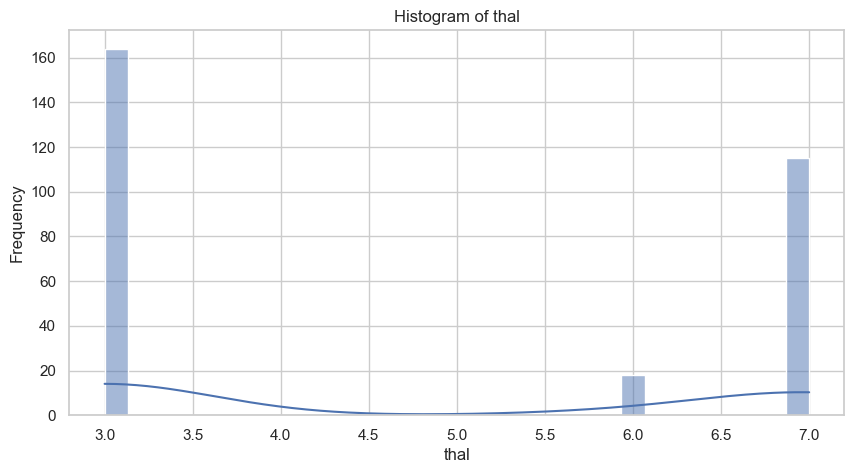

In [13]:
# do a histogram for each of the features
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style of seaborn
sns.set(style="whitegrid")
# Set the figure size
plt.figure(figsize=(15, 10))
# Loop through each feature and create a histogram
for feature in combined_df.columns[:-1]:  # Exclude the target variable
    plt.figure(figsize=(10, 5))
    sns.histplot(combined_df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()